In [22]:
import numpy as np
import matplotlib.pyplot as plt

def advect_2d_upwind(u0, cx, cy, t_final, Lx=1.0, Ly=1.0, nx=100, ny=100, nt=500, bc='dirichlet'):
    """
    u0: initial condition array shape (ny, nx)
    cx, cy: advection velocities (scalars)
    bc: 'periodic' or 'dirichlet' (zero)
    returns u at final time and history optionally
    """
    dx = Lx / nx
    dy = Ly / ny
    dt = t_final / nt
    sigma_x = abs(cx) * dt / dx
    sigma_y = abs(cy) * dt / dy
    if sigma_x + sigma_y > 1.0:
        print("WARNING: CFL condition maybe violated: sigma_x+sigma_y =", sigma_x + sigma_y)

    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # Upwind x-direction
        if cx >= 0:
            ux = un - np.roll(un, 1, axis=1)   # u_i - u_{i-1}
        else:
            ux = np.roll(un, -1, axis=1) - un  # u_{i+1} - u_i
        # Upwind y-direction
        if cy >= 0:
            uy = un - np.roll(un, 1, axis=0)
        else:
            uy = np.roll(un, -1, axis=0) - un

        # update
        u = un - cx * dt / dx * ux - cy * dt / dy * uy

        if bc == 'dirichlet':
            u[0, :] = 0
            u[-1, :] = 0
            u[:, 0] = 0
            u[:, -1] = 0
        # periodic already handled by np.roll

    return u

def exacta(X, Y, time, amplitudes, cx, cy):
    f = np.zeros((100,100))
    for k in range(1, 3):
        shifted_x = (X - cx * time) % 1.0
        shifted_y = (Y - cy * time) % 1.0
        f += amplitudes[k - 1] * np.sin(2 * np.pi * k * shifted_x) * np.sin(2 * np.pi * k * shifted_y)
    return f

################################################################

def plot_solution(amplitudes, cx, cy, time):
    nx = ny = 100
    x = np.linspace(0, 1, nx, endpoint=False)
    y = np.linspace(0, 1, ny, endpoint=False)
    X, Y = np.meshgrid(x, y)
    
    # condición inicial
    u0 = np.zeros((nx, ny))
    for k in range(1, 3):
        u0 += amplitudes[k - 1] * np.sin(2 * np.pi * k * X) * np.sin(2 * np.pi * k * Y)
    
    u_fdm = advect_2d_upwind(u0, cx, cy, t_final=time, bc="periodic")
    u_exact = exacta(X, Y, time, amplitudes, cx, cy)
    error = np.abs(u_exact - u_fdm)
    
    fig = plt.figure(figsize=(15, 4))
    plt.suptitle(f"Solución y error para t={time:.2f}", fontsize=14)
    
    data = {
        "Solución DF": u_fdm,
        "Solución Exacta": u_exact,
        "Error |DF − Exacta|": error,
    }
    
    for idx, (title, field) in enumerate(data.items()):
        ax = plt.subplot(1, 3, idx + 1)
        ax.set_title(title)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    
        im = ax.imshow(
            field,
            origin="lower",
            extent=[0, 1, 0, 1],
            aspect="auto",
        )
        fig.colorbar(im, ax=ax)

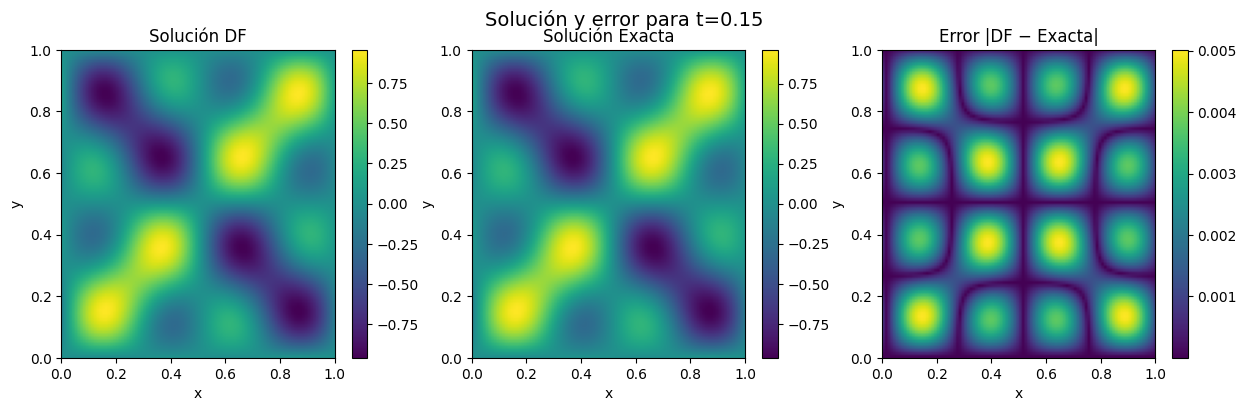

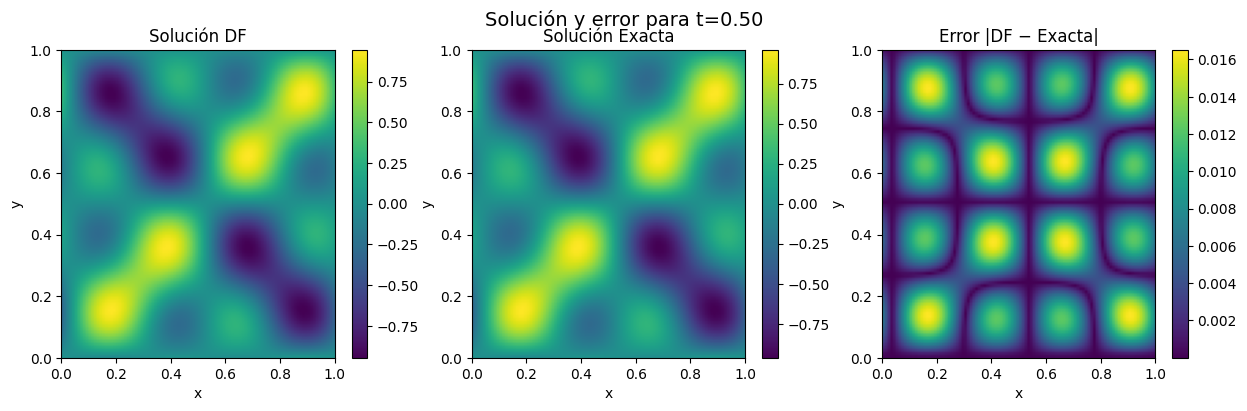

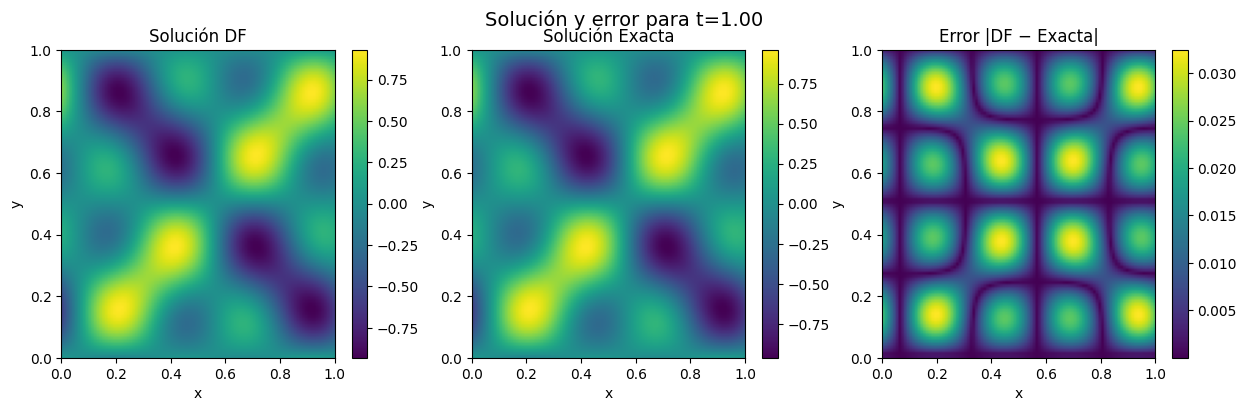

In [24]:
# train
amplitudes = [0.6651902198791504, 0.5823043584823608]
cx, cy = 0.0589461624622345, 0.00477290153503418
# test
# amplitudes = [0.32162296772003174, 0.3009556531906128]
# cx, cy = 0.1551232933998108, 0.3082885146141052

plot_solution(amplitudes, cx, cy, time=0.15)
plot_solution(amplitudes, cx, cy, time=0.5)
plot_solution(amplitudes, cx, cy, time=1.0)